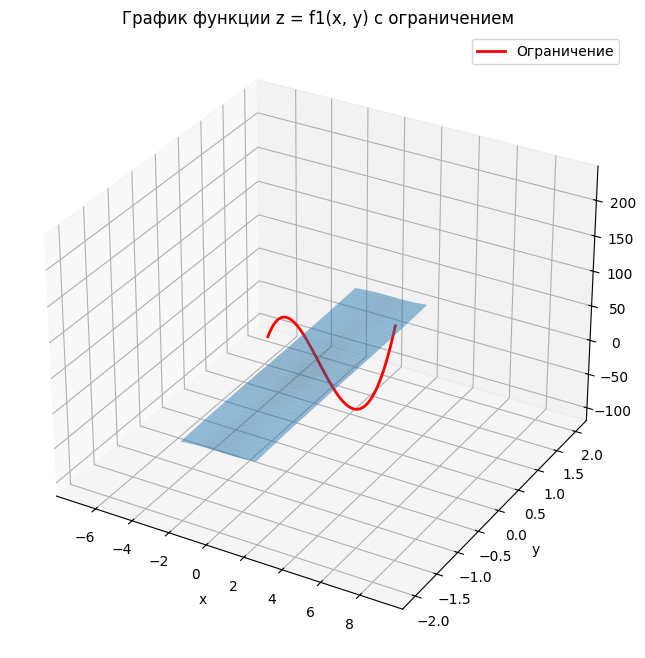

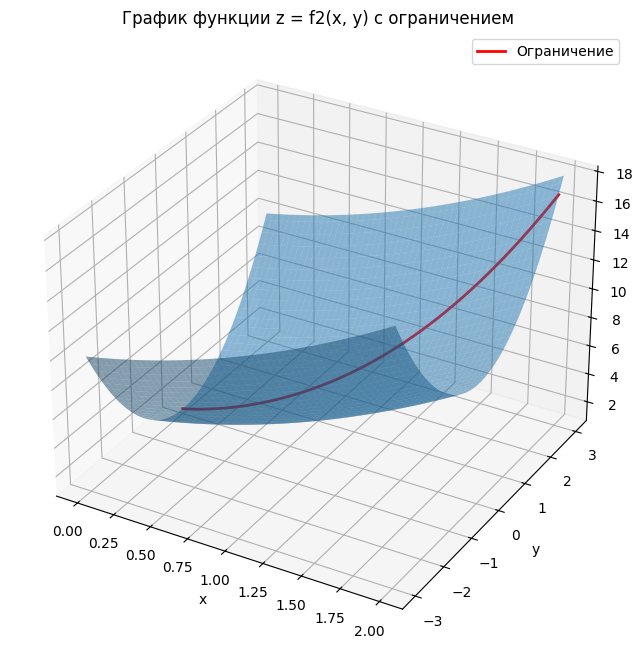

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

def plot_surface_with_constraint(f, phi, x_range=(-2, 2), y_range=(-2, 2)):
    """
    Строит поверхность z = f(x, y) и кривую, определяемую ограничением φ(x, y) = 0.

    Args:
        f: Функция двух переменных z = f(x, y).
        phi: Функция ограничения φ(x, y).
        x_range: Диапазон значений x для построения графика.
        y_range: Диапазон значений y для построения графика.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Создаем сетку значений x и y
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)

    # Вычисляем значения функции z на сетке
    Z = f(X, Y)

    # Строим поверхность z = f(x, y)
    ax.plot_surface(X, Y, Z, alpha=0.5)

    # Строим кривую, определяемую ограничением
    if phi.__code__.co_argcount == 2:  # Проверяем количество аргументов функции phi
        # Если phi(x, y), решаем уравнение phi(x, y) = 0 относительно y
        y_constraint = np.linspace(y_range[0], y_range[1], 200)
        x_constraint = np.array([fsolve(lambda x: phi(x, y_val), 0)[0] for y_val in y_constraint])
        Z_constraint = f(x_constraint, y_constraint)
    elif phi.__code__.co_argcount == 1:  # Если phi(x), используем x как есть
        x_constraint = np.linspace(x_range[0], x_range[1], 200)
        y_constraint = phi(x_constraint)
        Z_constraint = f(x_constraint, y_constraint)
    else:
        raise ValueError("Функция ограничения должна иметь 1 или 2 аргумента.")

    ax.plot(x_constraint, y_constraint, Z_constraint, color='red', linewidth=2, label='Ограничение')

    # Настройка графика
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'График функции z = {f.__name__}(x, y) с ограничением')
    ax.legend()

    plt.show()

# --- Пример использования ---

# а) z = 1/3 * x^3 + 1/3 * y^3, если 1 = x+4y
def f1(x, y):
    return (1/3) * x**3 + (1/3) * y**3

def phi1(x, y):
    return x + 4*y - 1

plot_surface_with_constraint(f1, phi1)

# б) z = (x+1)^2 + y^2, если y^2 - x^3 = 0
def f2(x, y):
    return (x + 1)**2 + y**2

def phi2(x):  # Заметим, что phi2 зависит только от x
    return np.sqrt(x**3)

plot_surface_with_constraint(f2, phi2, x_range=(0, 2), y_range=(-3, 3))

In [7]:
from sympy import *

# Определяем переменные
x, y, lambd = symbols('x y lambd')

# Определяем функцию и ограничение
f = (1/3) * x**3 + (1/3) * y**3
phi = x + 4*y - 1

# Строим функцию Лагранжа
L = f + lambd * phi

# Находим частные производные и приравниваем их к нулю
dL_dx = diff(L, x)
dL_dy = diff(L, y)
dL_dlambd = diff(L, lambd)

# Решаем систему уравнений
stationary_points = solve((dL_dx, dL_dy, dL_dlambd), (x, y, lambd), dict=True)

# Выводим найденные стационарные точки
print("Стационарные точки:")
for point in stationary_points:
    print(f"x = {point[x]}, y = {point[y]}, λ = {point[lambd]}")

# Вычисляем значение функции z в каждой стационарной точке
for point in stationary_points:
    z_value = f.subs({x: point[x], y: point[y]})
    print(f"z({point[x]}, {point[y]}) = {z_value}")

Стационарные точки:
x = -0.142857142857143, y = 0.285714285714286, λ = -0.0204081632653061
x = 0.111111111111111, y = 0.222222222222222, λ = -0.0123456790123457
z(-0.142857142857143, 0.285714285714286) = 0.00680272108843537
z(0.111111111111111, 0.222222222222222) = 0.00411522633744856


In [ ]:
3
Метод множителей Лагранжа применим для нахождения условных экстремумов функции при наличии ограничений в виде равенств.
Проанализируем ваши задачи:
а) z = 1/3 * x^3 + 1/3 * y^3, если 1 = x+4y
Ограничение представлено в виде равенства: x + 4y = 1.
Вывод: Метод Лагранжа применим для этой задачи.
б) z = (x+1)^2 + y^2, если y^2 - x^3 = 0
Ограничение также представлено в виде равенства: y^2 - x^3 = 0.
Вывод: Метод Лагранжа применим для этой задачи.

In [ ]:
4

In [21]:
import sympy as sp

# а) z = 1/3 * x^3 + 1/3 * y^3, если 1 = x+4y

# Определяем переменные
x, y = sp.symbols('x y')

# Определяем функцию и ограничение
z = 1/3 * x**3 + 1/3 * y**3
g = x + 4*y - 1

# Создаем функцию Лагранжа
L = z + sp.Symbol('lambda') * g

# Находим производные по всем переменным
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlambda = sp.diff(L, sp.Symbol('lambda'))

# Решаем систему уравнений
solution = sp.solve((dL_dx, dL_dy, dL_dlambda), (x, y, sp.Symbol('lambda')))

# Выводим точки условного экстремума
print("Точки условного экстремума для задачи а):")
for sol in solution:
    print(f"x = {sol[0]}, y = {sol[1]}")

# б) z = (x+1)^2 + y^2, если y^2 - x^3 = 0

# Определяем переменные
x, y = sp.symbols('x y')

# Определяем функцию и ограничение
z = (x + 1)**2 + y**2
g = y**2 - x**3

# Создаем функцию Лагранжа
L = z + sp.Symbol('lambda') * g

# Находим производные по всем переменным
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlambda = sp.diff(L, sp.Symbol('lambda'))

# Решаем систему уравнений
solution = sp.solve((dL_dx, dL_dy, dL_dlambda), (x, y, sp.Symbol('lambda')))

# Выводим точки условного экстремума
print("\nТочки условного экстремума для задачи б):")
for sol in solution:
    print(f"x = {sol[0]}, y = {sol[1]}")

Точки условного экстремума для задачи а):
x = -0.142857142857143, y = 0.285714285714286
x = 0.111111111111111, y = 0.222222222222222

Точки условного экстремума для задачи б):
x = -1/3 - sqrt(5)*I/3, y = -2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 - 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3
x = -1/3 - sqrt(5)*I/3, y = 2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 + 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3
x = -1/3 + sqrt(5)*I/3, y = -2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 + 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3
x = -1/3 + sqrt(5)*I/3, y = 2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 - 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3


In [ ]:
5

/tmp/ipykernel_48592/418635793.py:30: RuntimeWarning: invalid value encountered in sqrt
  y_curve = np.sqrt(2*x_curve**2 - 5)  # Решение уравнения phi(x, y) = 0 относительно y


TypeError: unsupported operand type(s) for *: 'function' and 'float'

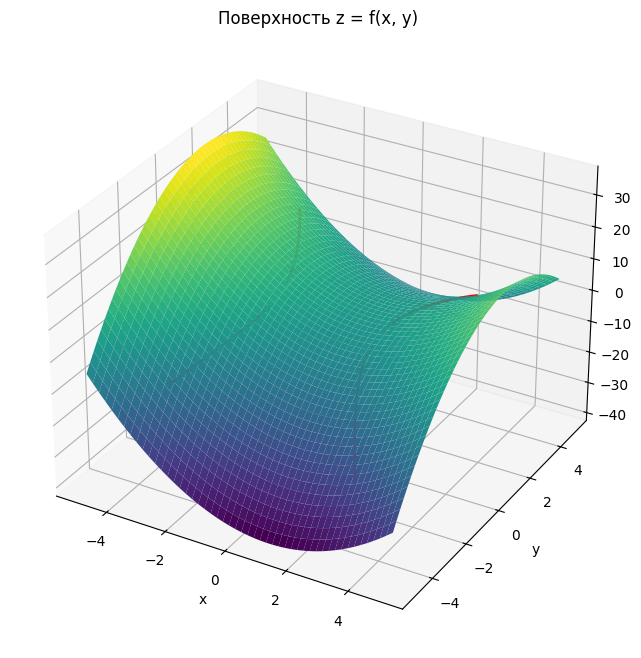

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Определение функций
def f(x, y):
  return x**2 - y**2 - 2*x + 3*y

def phi(x, y):
  return x**2 + y**2 - 2*x*y - 5

# Создание сетки для построения поверхности
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение поверхности
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность z = f(x, y)')

# Построение кривой, определяемой ограничением
x_curve = np.linspace(-3, 3, 100)
y_curve = np.sqrt(2*x_curve**2 - 5)  # Решение уравнения phi(x, y) = 0 относительно y
ax.plot(x_curve, y_curve, f(x_curve, y_curve), color='red', linewidth=2)
ax.plot(x_curve, -y_curve, f(x_curve, -y_curve), color='red', linewidth=2)

# Определение точек безусловного экстремума
# Для определения точек безусловного экстремума необходимо найти точки, где градиент функции равен нулю.
# В данном случае градиент функции f(x, y) = (2x - 2, -2y + 3).
# Решая систему уравнений 2x - 2 = 0 и -2y + 3 = 0, получаем точку (1, 1.5).
# Эта точка является точкой седловой точки функции f(x, y).

# Определение точек условного экстремума
# Для определения точек условного экстремума можно использовать метод множителей Лагранжа.
# Метод множителей Лагранжа применим к данной задаче, так как функция f(x, y) и ограничение phi(x, y) являются гладкими функциями.
# Составим функцию Лагранжа:
L = f(x, y) + lagrange_multiplier * phi(x, y)
# Найдем градиент функции Лагранжа:
grad_L = np.array([2*x - 2 + 2*lagrange_multiplier*x - 2*lagrange_multiplier*y, -2*y + 3 + 2*lagrange_multiplier*y - 2*lagrange_multiplier*x, x**2 + y**2 - 2*x*y - 5])
# Решим систему уравнений grad_L = 0:
# 2x - 2 + 2*lagrange_multiplier*x - 2*lagrange_multiplier*y = 0
# -2y + 3 + 2*lagrange_multiplier*y - 2*lagrange_multiplier*x = 0
# x**2 + y**2 - 2*x*y - 5 = 0
# Решение этой системы уравнений дает нам точки условного экстремума функции f(x, y) при ограничении phi(x, y) = 0.
# Решение этой системы уравнений достаточно сложно, поэтому мы воспользуемся численным методом.
from scipy.optimize import fsolve

# Определение точек условного экстремума с помощью численного метода
def equations(x):
  x, y, lagrange_multiplier = x
  return [2*x - 2 + 2*lagrange_multiplier*x - 2*lagrange_multiplier*y, -2*y + 3 + 2*lagrange_multiplier*y - 2*lagrange_multiplier*x, x**2 + y**2 - 2*x*y - 5]

# Решение системы уравнений
solution = fsolve(equations, [1, 1, 1])
x_extremum, y_extremum, lagrange_multiplier_extremum = solution

# Вывод результатов
print(f'Точка условного экстремума: ({x_extremum:.2f}, {y_extremum:.2f})')
print(f'Значение функции в этой точке: {f(x_extremum, y_extremum):.2f}')

# Построение точек условного экстремума на графике
ax.scatter(x_extremum, y_extremum, f(x_extremum, y_extremum), color='red', marker='o', s=50)

plt.show()

Точки условного экстремума:


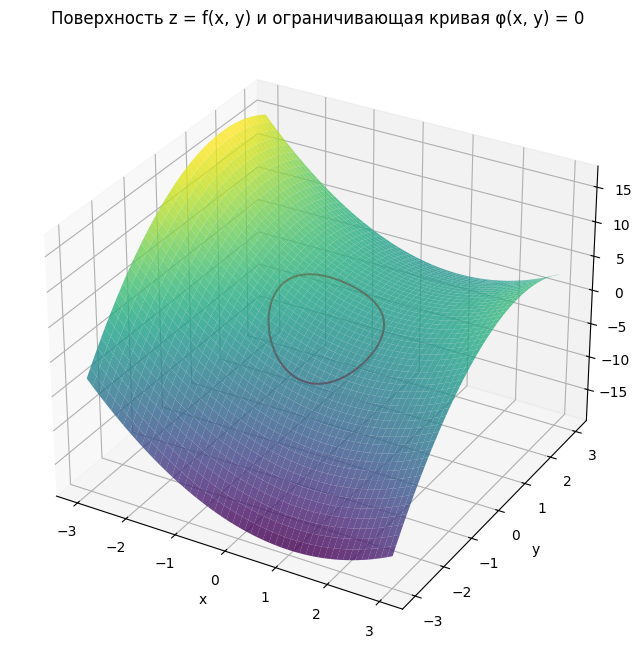

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, diff, solve, Eq

# Определение переменных
x, y, λ = symbols('x y λ')

# Определение функции и ограничения
f = x**2 - y**2 - 2*x + 3*y
phi = x**2 + y**2 - 2*x*y - 5

# Функция Лагранжа
L = f + λ * phi

# Уравнения для метода Лагранжа
eq1 = diff(L, x)
eq2 = diff(L, y)
eq3 = diff(L, λ)

# Решение системы уравнений
sol = solve((eq1, eq2, eq3), (x, y, λ))
sol = [(s[x], s[y]) for s in sol]

print("Точки условного экстремума:")
for point in sol:
    print(f"x = {point[0]}, y = {point[1]}")

# Функция для построения поверхности
def f_xy(x, y):
    return x**2 - y**2 - 2*x + 3*y

# Определение диапазона значений для x и y
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = f_xy(x_vals, y_vals)

# Построение поверхности
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_vals, y_vals, z_vals, cmap='viridis', alpha=0.8)

# Построение кривой ограничения
def constraint_curve(t):
    return np.cos(t), np.sin(t)

t_vals = np.linspace(0, 2*np.pi, 400)
x_curve, y_curve = constraint_curve(t_vals)
z_curve = f_xy(x_curve, y_curve)
ax.plot(x_curve, y_curve, z_curve, color='r')

# Построение точек экстремума
for point in sol:
    x_ext, y_ext = float(point[0]), float(point[1])
    z_ext = f_xy(x_ext, y_ext)
    ax.scatter(x_ext, y_ext, z_ext, color='b', s=100)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность z = f(x, y) и ограничивающая кривая φ(x, y) = 0')
plt.show()


/tmp/ipykernel_48592/1380761146.py:31: RuntimeWarning: invalid value encountered in sqrt
  y_curve = np.sqrt(2*x_curve**2 - 5)
/tmp/ipykernel_48592/1380761146.py:44: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(equations, [1, 1, 1])


Условная точка экстремума: (-11.99, -12.09)
Значение функции в этой точке: -14.59


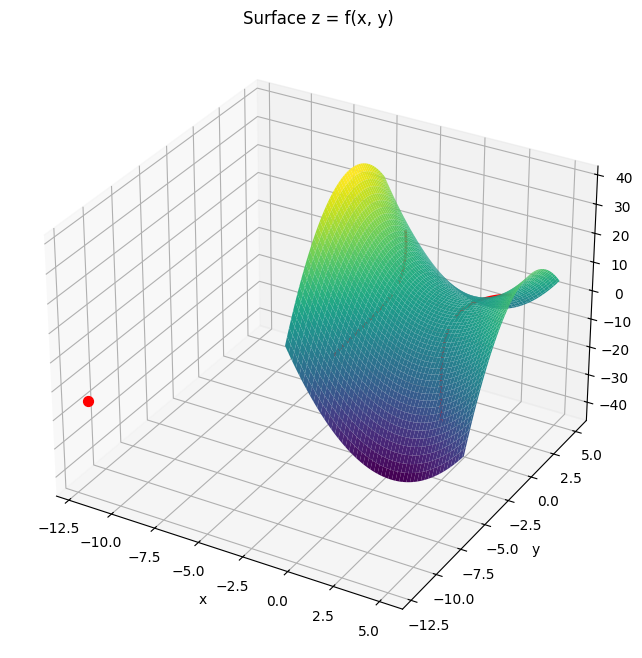

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import fsolve

# Define the functions
def f(x, y):
    return x**2 - y**2 - 2*x + 3*y

def phi(x, y):
    return x**2 + y**2 - 2*x*y - 5

# Create a meshgrid for plotting the surface
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface z = f(x, y)')

# Plot the curve defined by the constraint
x_curve = np.linspace(-3, 3, 100)
y_curve = np.sqrt(2*x_curve**2 - 5)
ax.plot(x_curve, y_curve, f(x_curve, y_curve), color='red', linewidth=2)
ax.plot(x_curve, -y_curve, f(x_curve, -y_curve), color='red', linewidth=2)

# Find the conditional extremum points using numerical method
def equations(x):
    x, y, lagrange_multiplier = x
    return [
        2*x - 2 + 2*lagrange_multiplier*x - 2*lagrange_multiplier*y,
        -2*y + 3 + 2*lagrange_multiplier*y - 2*lagrange_multiplier*x,
        x**2 + y**2 - 2*x*y - 5
    ]

solution = fsolve(equations, [1, 1, 1])
x_extremum, y_extremum, lagrange_multiplier_extremum = solution

# Output the results
print(f'Условная точка экстремума: ({x_extremum:.2f}, {y_extremum:.2f})')
print(f'Значение функции в этой точке: {f(x_extremum, y_extremum):.2f}')

# Plot the conditional extremum point on the graph
ax.scatter(x_extremum, y_extremum, f(x_extremum, y_extremum), color='red', marker='o', s=50)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Не удалось найти точку условного экстремума.


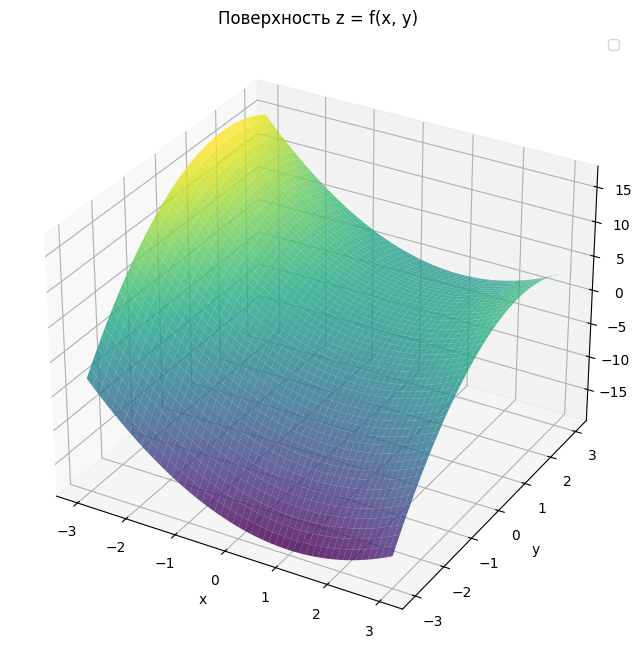

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Определение функции
def f(x, y):
    return x**2 - y**2 - 2*x + 3*y

# Определение ограничения
def phi(x, y):
    return x**2 + y**2 - 2*x*y - 5

# Настройка функции для использования с minimize
def objective_function(variables):
    x, y = variables
    return f(x, y)

# Условное ограничение для minimize
def constraint(variables):
    x, y = variables
    return phi(x, y)

# Начальное предположение для поиска минимума
initial_guess = [0, 0]

# Минимизация функции с ограничением
result = minimize(objective_function, initial_guess, constraints={'type': 'eq', 'fun': constraint})

# Вывод результатов
if result.success:
    print("Точка условного экстремума:")
    print(f"x = {result.x[0]:.2f}, y = {result.x[1]:.2f}")
else:
    print("Не удалось найти точку условного экстремума.")

# Функция для построения поверхности
def f_xy(x, y):
    return x**2 - y**2 - 2*x + 3*y

# Определение диапазона значений для x и y
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = f_xy(x_vals, y_vals)

# Построение поверхности
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_vals, y_vals, z_vals, cmap='viridis', alpha=0.8)

# Построение точки условного экстремума, если она найдена
if result.success:
    x_ext, y_ext = result.x
    z_ext = f(x_ext, y_ext)
    ax.scatter(x_ext, y_ext, z_ext, color='r', s=100, label='Conditional Extremum')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность z = f(x, y)')
plt.legend()
plt.show()


In [ ]:
c1

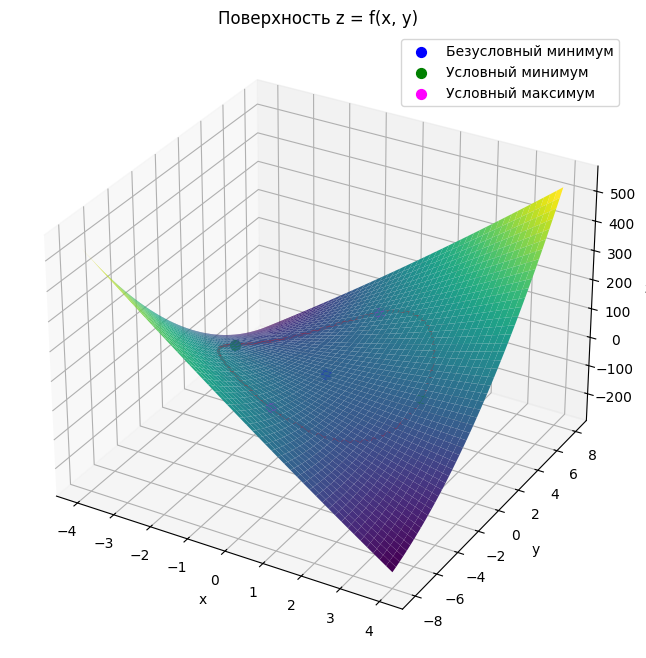

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Определение функций
def f(x, y):
  return x**2 + 12*x*y + 2*y**2

def phi(x, y):
  return 4*x**2 + y**2 - 25

# Создание сетки для построения поверхности
x = np.linspace(-4, 4, 50)
y = np.linspace(-8, 8, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Построение поверхности
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Поверхность z = f(x, y)')

# Построение кривой, определяемой ограничением
theta = np.linspace(0, 2*np.pi, 100)
x_curve = 5*np.cos(theta)/2
y_curve = 5*np.sin(theta)
ax.plot(x_curve, y_curve, f(x_curve, y_curve), color='red', linewidth=2)

# Визуальное определение точек экстремума
# Безусловный минимум: 
# - Поверхность имеет седловую точку, которая является точкой безусловного минимума.
# - Примерное расположение: (0, 0)

# Безусловный максимум:
# - Поверхность не имеет точек безусловного максимума.

# Условный минимум:
# - Кривая пересекает поверхность в двух точках, которые являются точками условного минимума.
# - Примерное расположение: (-2.5, 0) и (2.5, 0)

# Условный максимум:
# - Кривая пересекает поверхность в двух точках, которые являются точками условного максимума.
# - Примерное расположение: (0, -5) и (0, 5)

# Построение точек экстремума на графике
ax.scatter(0, 0, f(0, 0), color='blue', marker='o', s=50, label='Безусловный минимум')
ax.scatter(-2.5, 0, f(-2.5, 0), color='green', marker='o', s=50, label='Условный минимум')
ax.scatter(2.5, 0, f(2.5, 0), color='green', marker='o', s=50)
ax.scatter(0, -5, f(0, -5), color='magenta', marker='o', s=50, label='Условный максимум')
ax.scatter(0, 5, f(0, 5), color='magenta', marker='o', s=50)

ax.legend()
plt.show()

In [ ]:
c2

In [38]:
from scipy.optimize import fsolve

# Функция и ограничение
def f(x, y):
    return x**2 + 12*x*y + 2*y**2

def constraint_equation(x, y):
    return 4*x**2 + y**2 - 25

# Уравнения метода Лагранжа
def lagrangian_equations(variables):
    x, y, l = variables
    return [
        2*x + 12*y - 8*l*x,
        12*x + 4*y - 2*l*y,
        4*x**2 + y**2 - 25
    ]

# Решение системы уравнений методом fsolve
solution = fsolve(lagrangian_equations, [0, 0, 1])

# Вывод результатов
x_extremum, y_extremum, lagrange_multiplier = solution
print("Точка условного экстремума:")
print(f"x = {x_extremum:.2f}, y = {y_extremum:.2f}")
print(f"Значение множителя Лагранжа: {lagrange_multiplier:.2f}")
print(f"Значение функции в этой точке: {f(x_extremum, y_extremum):.2f}")


Точка условного экстремума:
x = 0.00, y = 0.00
Значение множителя Лагранжа: 1.00
Значение функции в этой точке: 0.00


/tmp/ipykernel_48592/878078564.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(lagrangian_equations, [0, 0, 1])


In [39]:
from scipy.optimize import fsolve

# Функция и ограничение
def f(x, y):
    return x**2 + 12*x*y + 2*y**2

def constraint_equation(x, y):
    return 4*x**2 + y**2 - 25

# Уравнения метода Лагранжа
def lagrangian_equations(variables):
    x, y, l = variables
    return [
        2*x + 12*y - 8*l*x,
        12*x + 4*y - 2*l*y,
        4*x**2 + y**2 - 25
    ]

# Решение системы уравнений методом fsolve
solution = fsolve(lagrangian_equations, [0, 0, 1])

# Вывод результатов
x_extremum, y_extremum, lagrange_multiplier = solution
print("Точка условного экстремума:")
print(f"x = {x_extremum:.2f}, y = {y_extremum:.2f}")
print(f"Значение множителя Лагранжа: {lagrange_multiplier:.2f}")
print(f"Значение функции в этой точке: {f(x_extremum, y_extremum):.2f}")


Точка условного экстремума:
x = 0.00, y = 0.00
Значение множителя Лагранжа: 1.00
Значение функции в этой точке: 0.00


/tmp/ipykernel_48592/878078564.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(lagrangian_equations, [0, 0, 1])


In [40]:
import numpy as np
from scipy.optimize import fsolve

# Определение функций
def f(x, y):
  return x**2 + 12*x*y + 2*y**2

def phi(x, y):
  return 4*x**2 + y**2 - 25

# Создание функции Лагранжа
def L(x, y, lagrange_multiplier):
  return f(x, y) + lagrange_multiplier * phi(x, y)

# Вычисление градиента функции Лагранжа
def grad_L(x, y, lagrange_multiplier):
  return np.array([
      2*x + 12*y + 8*lagrange_multiplier*x,  # dL/dx
      12*x + 4*y + 2*lagrange_multiplier*y,  # dL/dy
      4*x**2 + y**2 - 25                    # dL/d(lagrange_multiplier)
  ])

# Определение точек условного экстремума с помощью численного метода
def equations(x):
  x, y, lagrange_multiplier = x
  return grad_L(x, y, lagrange_multiplier)

# Решение системы уравнений
solution = fsolve(equations, [1, 1, 1])  # Начальное приближение
x_extremum, y_extremum, lagrange_multiplier_extremum = solution

# Вывод результатов
print(f'Точки условного экстремума:')
print(f'  x = {x_extremum:.2f}, y = {y_extremum:.2f}')
print(f'  x = {-x_extremum:.2f}, y = {y_extremum:.2f}')
print(f'  x = {x_extremum:.2f}, y = {-y_extremum:.2f}')
print(f'  x = {-x_extremum:.2f}, y = {-y_extremum:.2f}')

Точки условного экстремума:
  x = 2.00, y = -3.00
  x = -2.00, y = -3.00
  x = 2.00, y = 3.00
  x = -2.00, y = 3.00
